In [10]:
import pandas as pd

# Read the preprocessed CSV file
dataset = pd.read_csv('preprocessed.csv')

# Inspect the DataFrame
print(df.head())


   duration  days_left  price   airline source_city departure_time stops  \
0      2.17          1   5953  SpiceJet       Delhi        Evening  zero   
1      2.33          1   5953  SpiceJet       Delhi  Early_Morning  zero   
2      2.17          1   5956   AirAsia       Delhi  Early_Morning  zero   
3      2.25          1   5955   Vistara       Delhi        Morning  zero   
4      2.33          1   5955   Vistara       Delhi        Morning  zero   

    arrival_time destination_city    class  
0          Night           Mumbai  Economy  
1        Morning           Mumbai  Economy  
2  Early_Morning           Mumbai  Economy  
3      Afternoon           Mumbai  Economy  
4        Morning           Mumbai  Economy  


# Graphical Data Visualisation

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Airline prices based on the class and company')

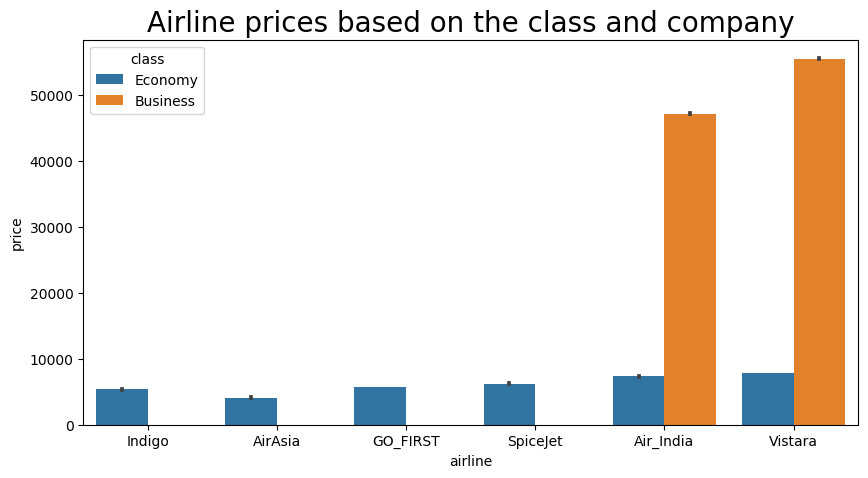

In [12]:
# How does the ticket price vary between Economy and Business class?

plt.figure(figsize=(10, 5))
sns.barplot(x='airline',y='price',hue="class",data=dataset.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

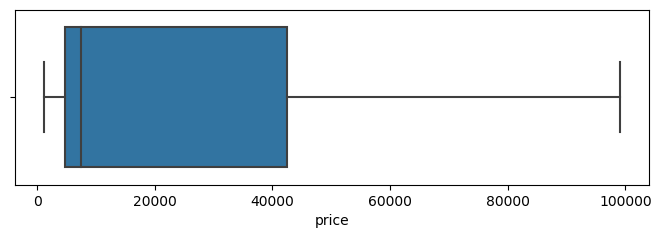

In [13]:
plt.figure(figsize = (18,5))
plt.subplot(2,2,1)
sns.boxplot(x = 'price', data = dataset)

In [14]:
# from this graph, we can see mean and median
# mean is around 20000 and median is approximately 7500

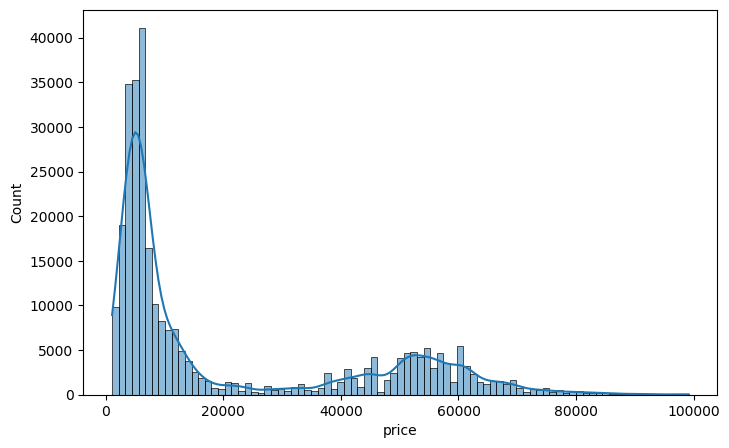

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = dataset, kde = True)

In [16]:
# From this histplot, we can understand that most of the people prefer ticket price range between 5000 to 15000

In [17]:
# Business flights are only available in two companies: Air India and Vistara. 
# Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

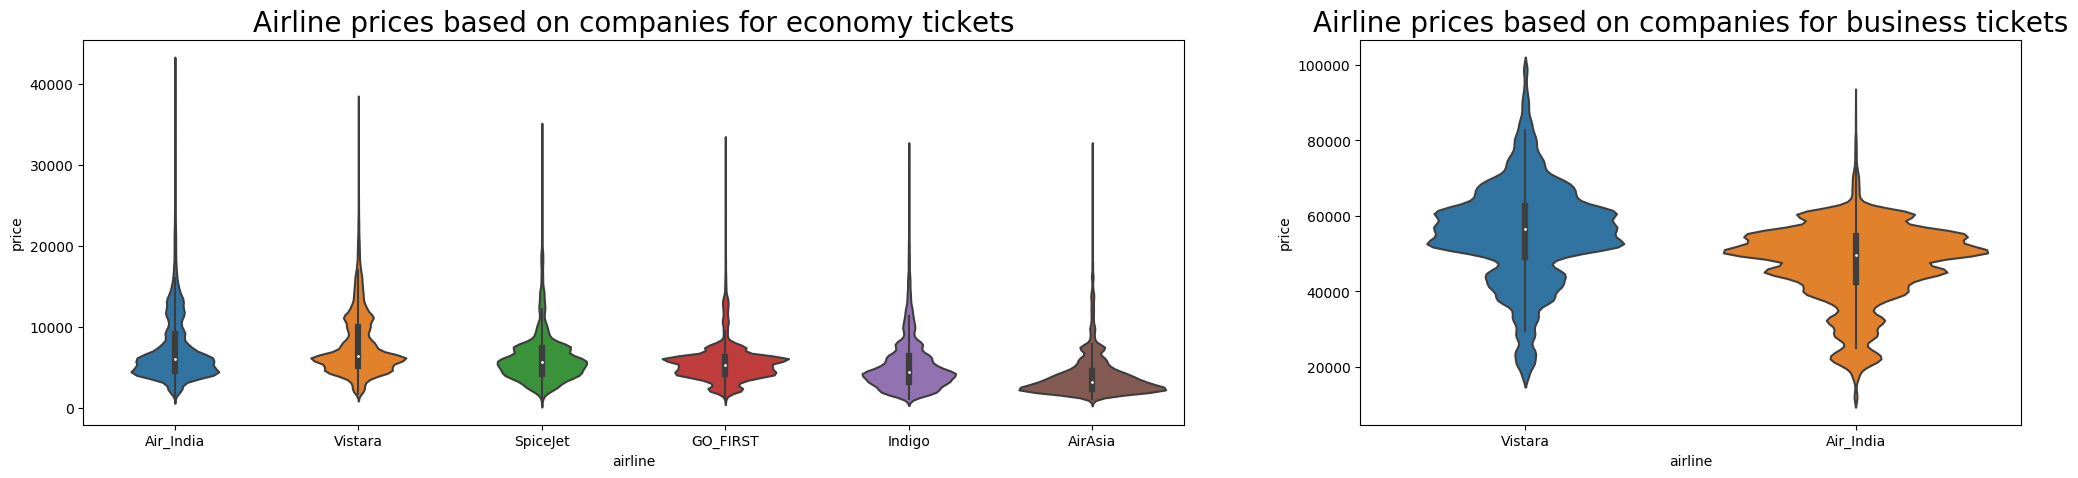

In [18]:
# Does price vary with Airlines?

# We will use violine plot for visualising airlinr prices 

fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "price", x = "airline",data = dataset.loc[dataset["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = dataset.loc[dataset["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

In [19]:
# There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. 
# However it looks like Vistara's business tickets are a little more expensive than the Air India.

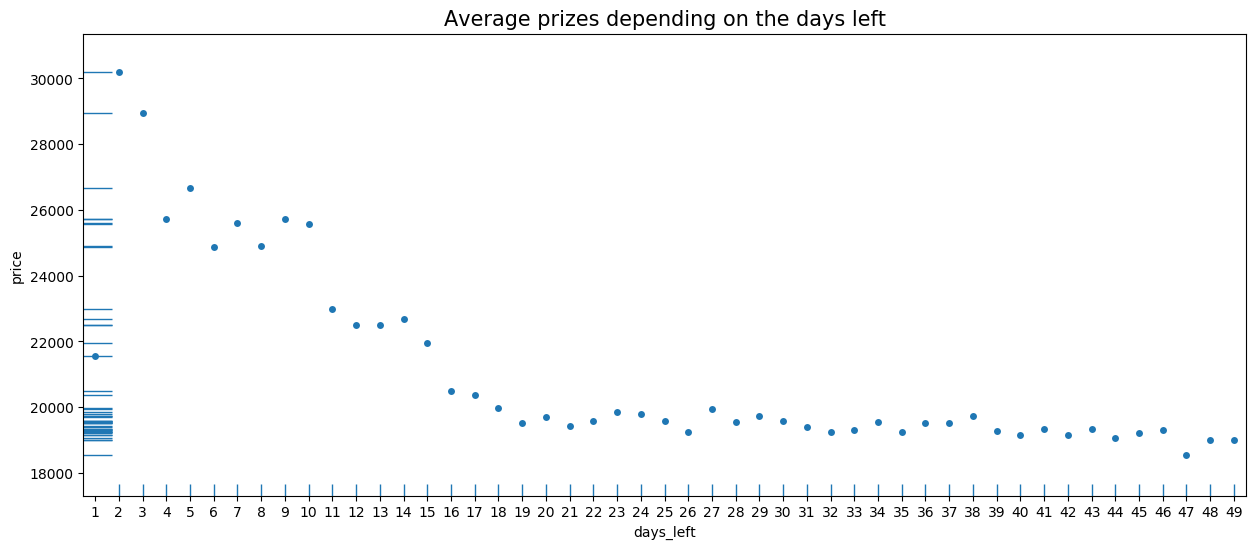

In [20]:
# How is the price affected when tickets are bought in just 1 or 2 days before departure?

dataset_temp = dataset.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.rugplot(x="days_left", y="price", data=dataset_temp).set_title("Average prizes depending on the days left",fontsize=15)
ax = sns.stripplot(x="days_left", y="price", data=dataset_temp)

In [21]:
# It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, 
# and a positive monotone curve between 20 and 2 days before
# The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. 
# This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

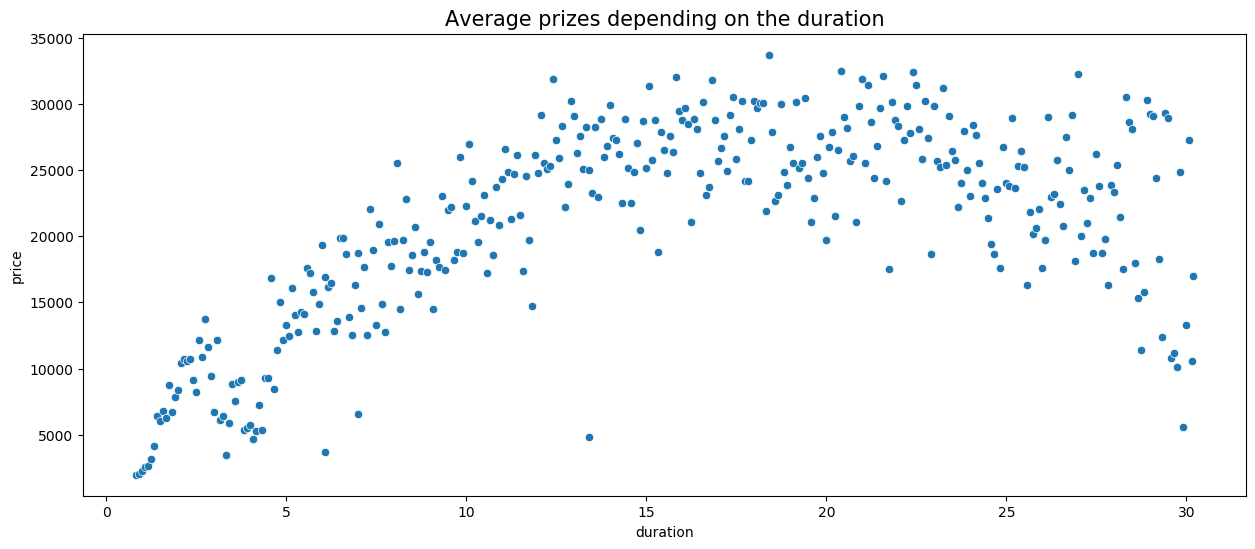

In [22]:
# Does the price change with the duration of the flight?

dataset_temp = dataset.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=dataset_temp).set_title("Average prizes depending on the duration",fontsize=15)

In [23]:
#  The prices reaches a high price at a duration of 20 hours before lowering again.

Text(0.5, 1.0, 'Airline prices based on the arrival time')

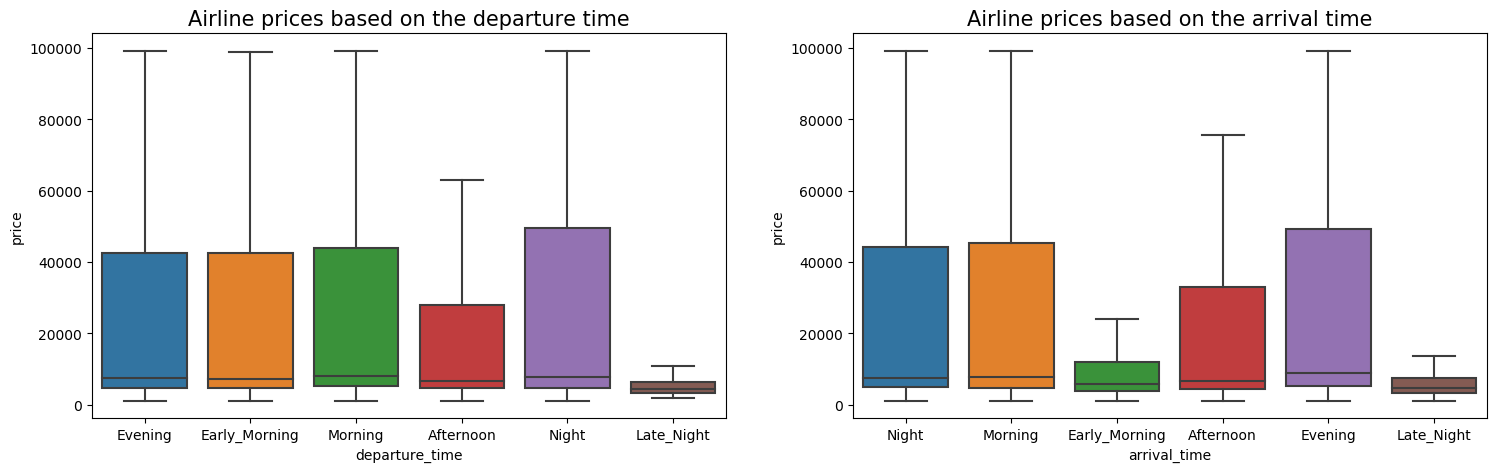

In [24]:
# Does ticket price change based on the departure time and arrival time?

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

In [25]:
# As expected, leaving at night or arriving at night remains the cheapest way to travel. 
# But it's also visible that arriving early morning is also cheap
# Afternoon flight are a bit cheaper that evening, morning and night flight.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

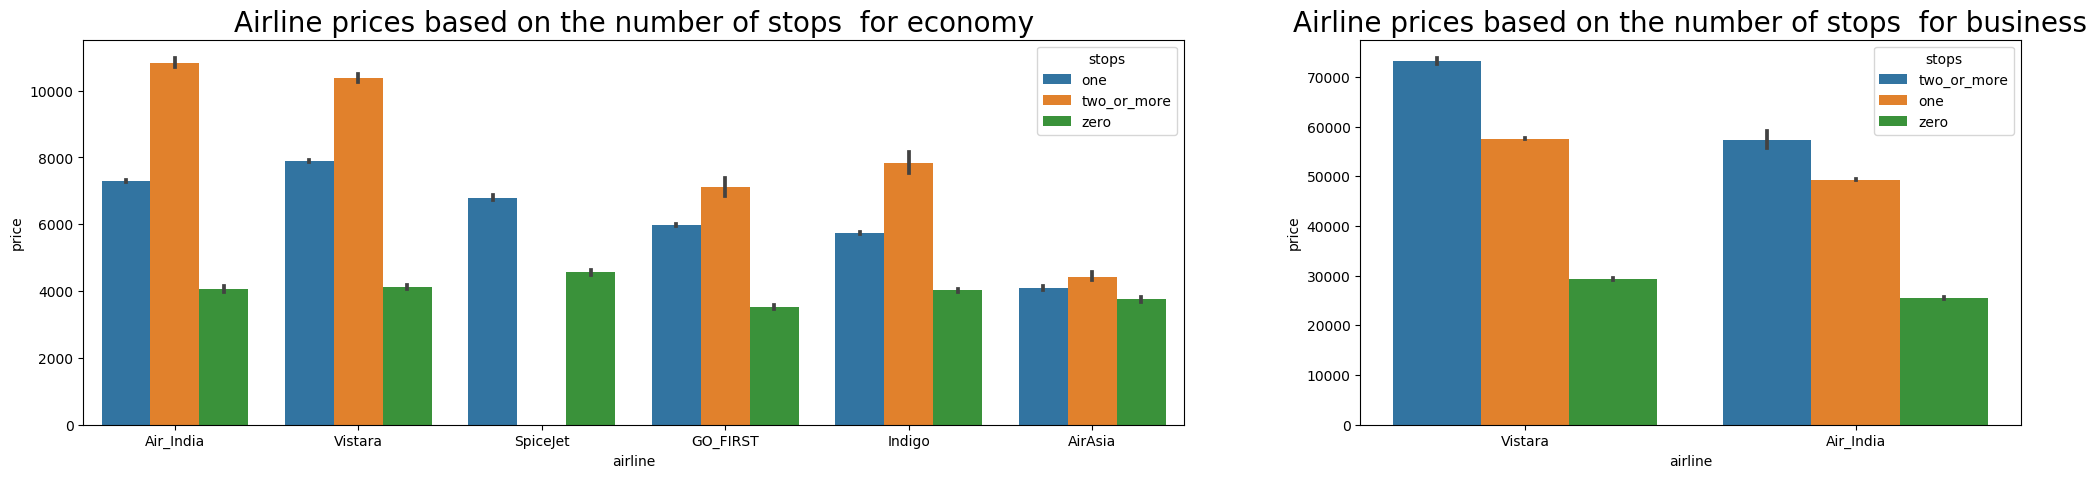

In [26]:
# Does the number of stops influences the price?

fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = dataset.loc[dataset["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = dataset.loc[dataset["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

In [27]:
# It is observed that AirAsia prices are low when compared to other companies.
# If there is more stops then it is more expensive except for AirAsia where the prices seems more constant.

# Converting all Categorical data in to numerical data

In [28]:
# Going to use Onehot encoding method

dataset["stops"] = dataset["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
dataset["class"] = dataset["class"].replace({'Economy':0,'Business':1}).astype(int)

In [29]:
dataset["source_city"] = dataset["source_city"].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Hyderabad':3,'Kolkata':4,'Mumbai':5}).astype(int)
dataset["destination_city"] = dataset["destination_city"].replace({'Delhi':0,'Bangalore':1,'Chennai':2,'Hyderabad':3,'Kolkata':4,'Mumbai':5}).astype(int)
dataset["departure_time"] = dataset["departure_time"].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5}).astype(int)
dataset["arrival_time"] = dataset["arrival_time"].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5}).astype(int)

In [30]:
dataset["airline"] = dataset["airline"].replace({'Air_India':0,'AirAsia':1,'GO_FIRST':2,'Indigo':3,'SpiceJet':4,'Vistara':5}).astype(int)
dataset["airline"].head()

0    4
1    4
2    1
3    5
4    5
Name: airline, dtype: int32

In [31]:
dataset.head()

,duration,days_left,price,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,2.17,1,5953,4,0,3,0,4,5,0
1,2.33,1,5953,4,0,0,0,1,5,0
2,2.17,1,5956,1,0,0,0,0,5,0
3,2.25,1,5955,5,0,1,0,2,5,0
4,2.33,1,5955,5,0,1,0,1,5,0


In [32]:
dataset.to_csv('flightprice.csv', index=False)